Download the MNIST dataset and perform the following operations on samples taken from its training
set.
1. Increase the size of the image by resizing it. Consider the scaling factor, target image dimensions and
interpolations. Visualize the resulting images with different aspect ratios.

In [1]:
#importing the library
import torch
import torchvision
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2
import numpy as np

ModuleNotFoundError: No module named 'torch'

In [ ]:
dataset = torchvision.datasets.MNIST(root="C:/Users/harsh/PycharmProjects/pythonProject/Computer Vision/Lab 3",download=True)

Text(0.5, 1.0, 'Sample Image from MNIST')

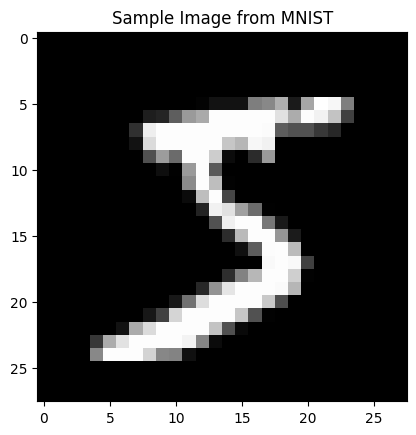

In [5]:
image = dataset.data[0]
plt.imshow(image, cmap='gray')
plt.title('Sample Image from MNIST')

In [2]:
# first 10 images and their labels from the dataset
images = dataset.data[:10]
labels = dataset.targets[:10]
images = images.numpy()

def display_images(images, labels, title, dimensions):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 4))

    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}\nDim: {dimensions[i]}')
        axes[i].axis('off')

    plt.suptitle(title)
    plt.show()

display_images(images, labels, title='Original Images',dimensions=[image.shape for image in images])


NameError: name 'dataset' is not defined

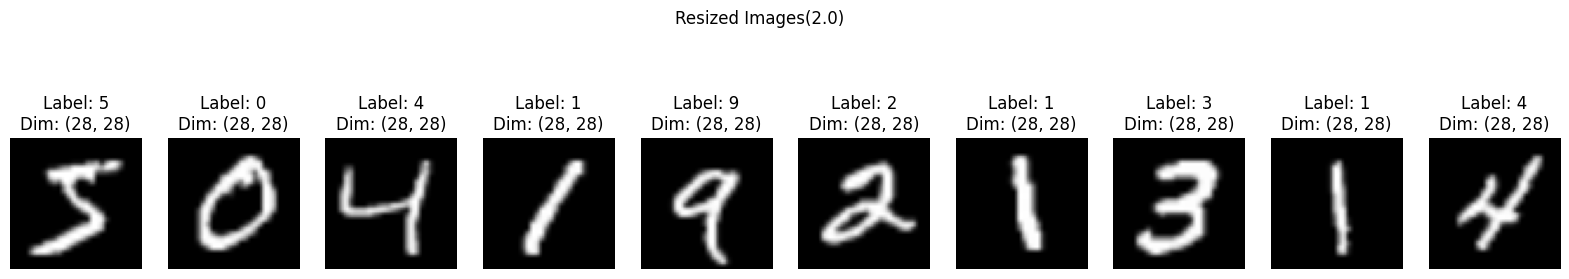

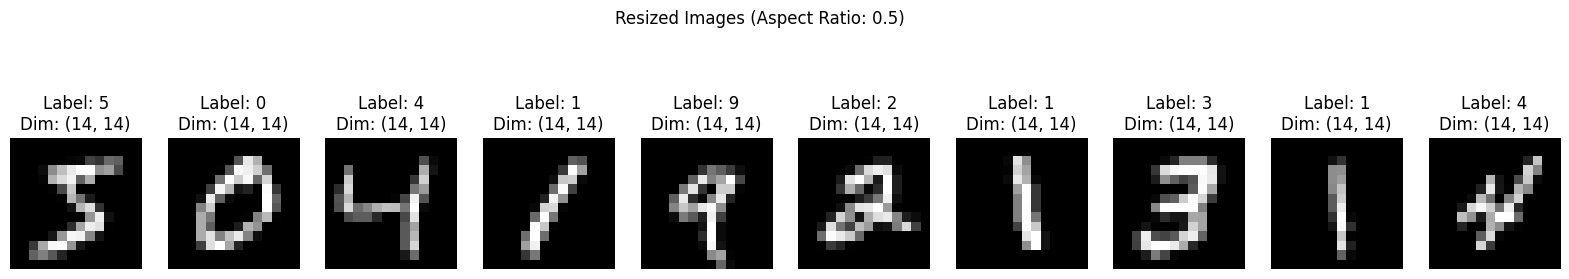

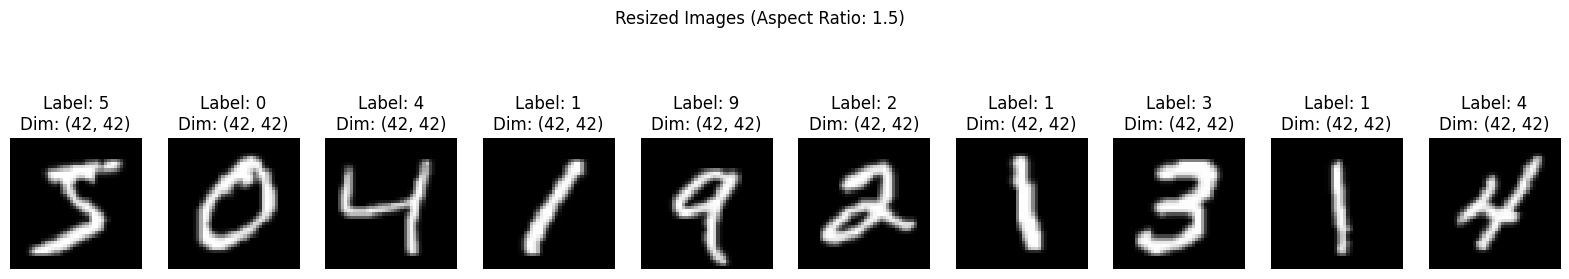

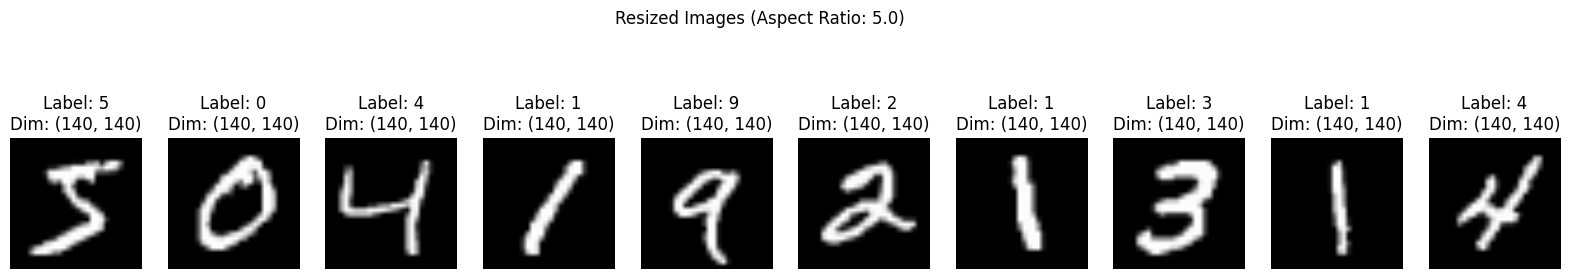

In [7]:
# Image Resizing
resized_images = []

for image in images:
    # Perform resizing with interpolation
    resized_image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_LINEAR)
    resized_images.append(resized_image)

display_images(resized_images, labels, title='Resized Images(2.0)', dimensions=[image.shape for image in images])

# Different Aspect Ratios for Resizing
aspect_ratios = [0.5, 1.5,5.0]

for aspect_ratio in aspect_ratios:
    resized_images = []

    for image in images:
        new_width = int(image.shape[1] * aspect_ratio)
        new_height = int(image.shape[0] * aspect_ratio)

        resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
        resized_images.append(resized_image)

    display_images(resized_images, labels, dimensions=[image.shape for image in resized_images], title=f'Resized Images (Aspect Ratio: {aspect_ratio})')

2. Perform translation, rotation and affine transformation on sample MNIST image data, as given in the link below:
https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

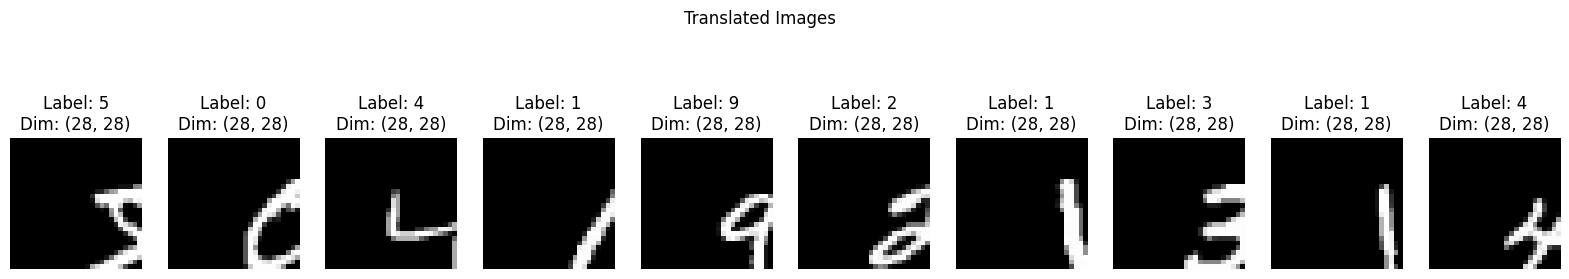

In [8]:
translated_images = []

for image in images:
    # Translation matrix
    translation_matrix = np.float32([[1, 0, 10], [0, 1, 5]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    translated_images.append(translated_image)

display_images(translated_images, labels, title='Translated Images', dimensions=[image.shape for image in images])


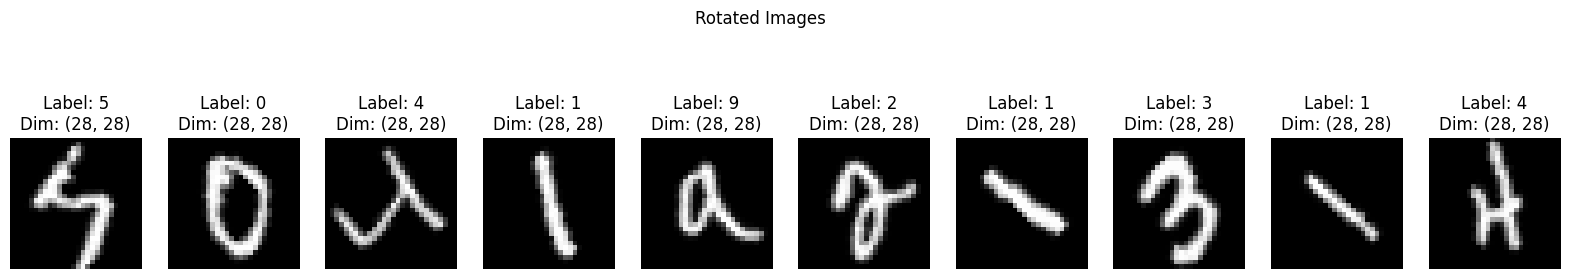

In [9]:
#Rotation
rotated_images = []

for image in images:
    #rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), 45, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    rotated_images.append(rotated_image)

display_images(rotated_images, labels, title='Rotated Images',dimensions=[image.shape for image in images])


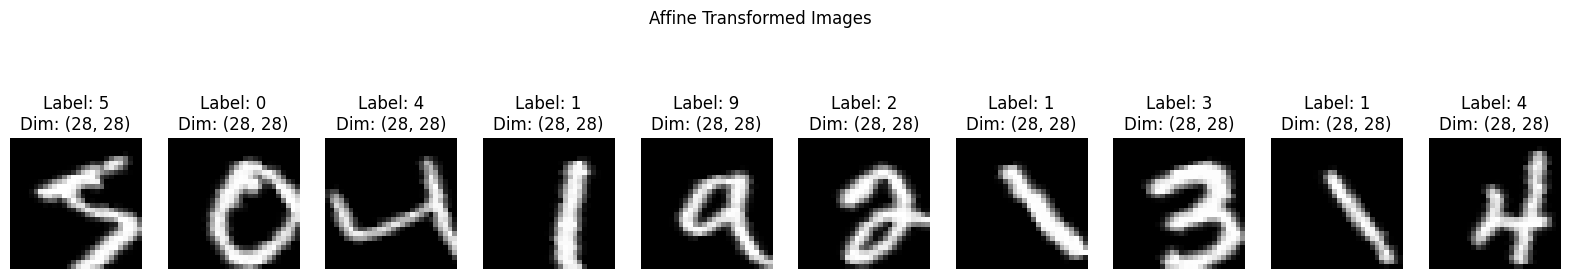

In [10]:
affine_transformed_images = []

for image in images:
    rows, cols = image.shape
    # Original points
    pts1 = np.float32([[5, 5], [20, 5], [5, 20]])
     # Transformed points
    pts2 = np.float32([[1, 10], [20, 5], [10, 25]])
    # Transformation matrix
    M_affine = cv2.getAffineTransform(pts1, pts2)
    affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))
    affine_transformed_images.append(affine_transformed_image)

display_images(affine_transformed_images, labels, title='Affine Transformed Images', dimensions=[image.shape for image in images])


3. Perform morphological transformations or erosion, dilation, opening, closing, etc. as given in the link below:
https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html


In [11]:
kernel = np.ones((2, 2), np.uint8)

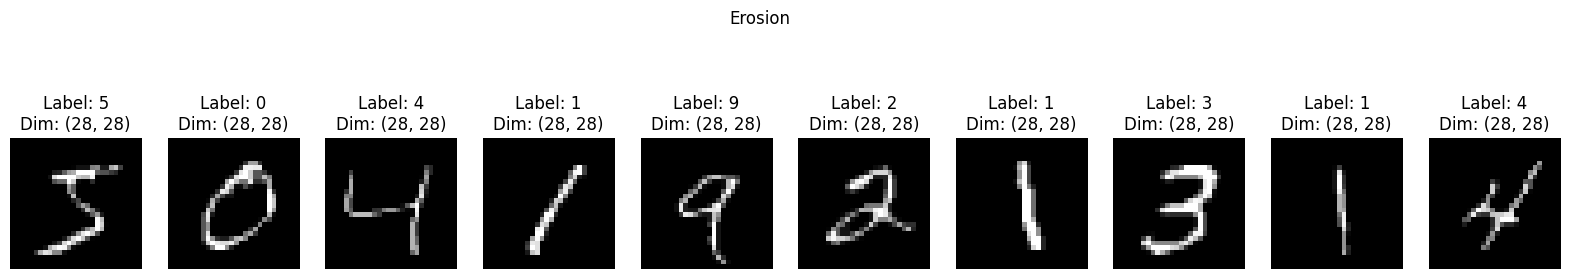

In [12]:
# Erosion
erosion_images = []
for image in images:
    erosion = cv2.erode(image, kernel, iterations=1)
    erosion_images.append(erosion)
display_images(erosion_images, labels, dimensions=[image.shape for image in erosion_images], title='Erosion')

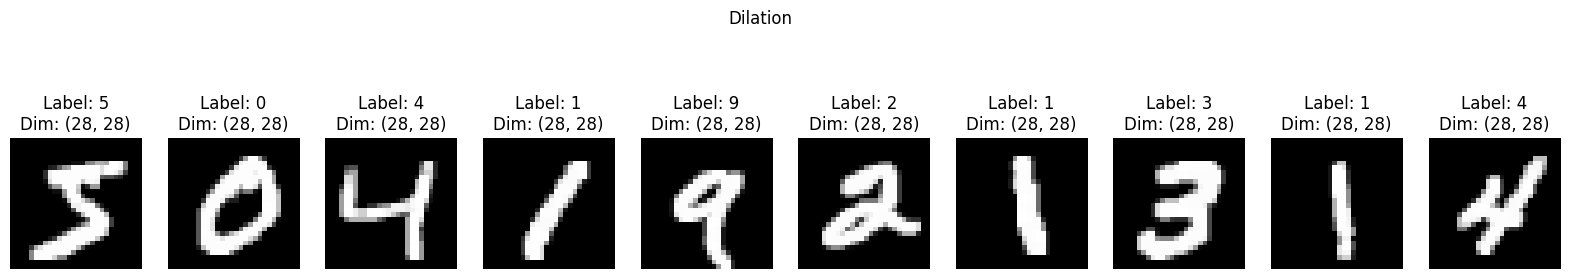

In [13]:
# Dilation
dilation_images = []
for image in images:
    dilation = cv2.dilate(image, kernel, iterations=1)
    dilation_images.append(dilation)
display_images(dilation_images, labels, dimensions=[image.shape for image in dilation_images], title='Dilation')

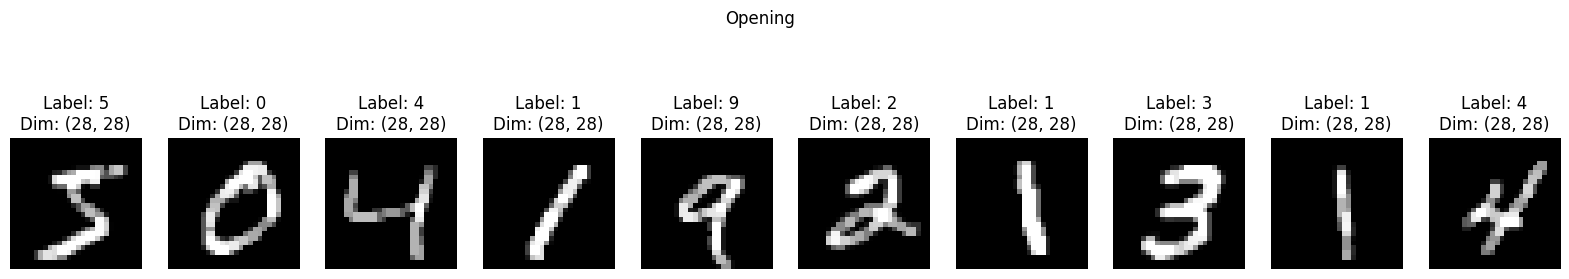

In [14]:
# Opening
opening_images = []
for image in images:
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    opening_images.append(opening)
display_images(opening_images, labels, dimensions=[image.shape for image in opening_images], title='Opening')

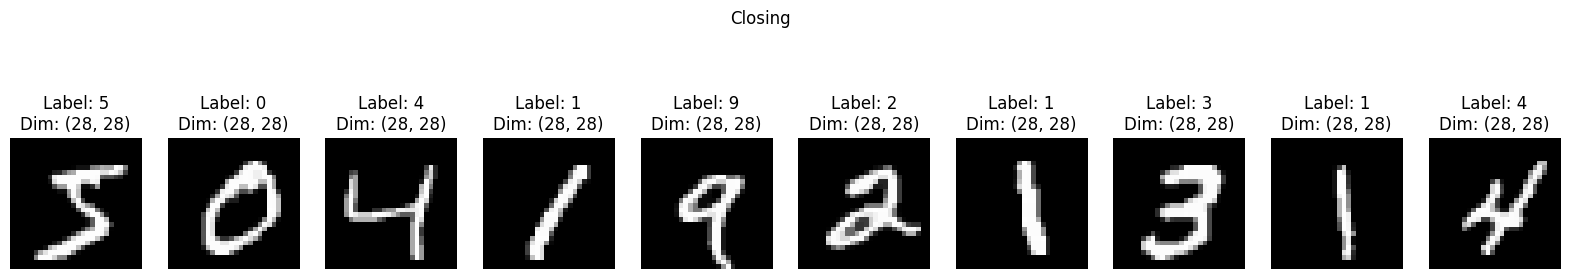

In [15]:
# Closing
closing_images = []
for image in images:
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    closing_images.append(closing)
display_images(closing_images, labels, dimensions=[image.shape for image in closing_images], title='Closing')

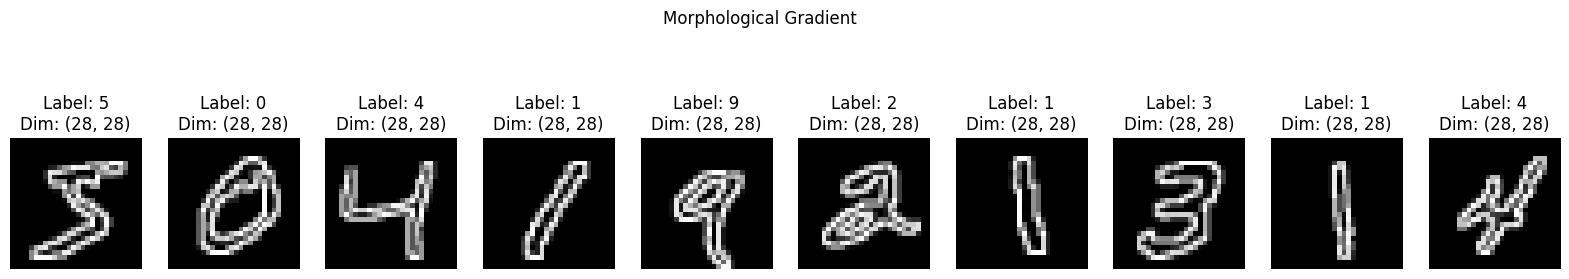

In [16]:
# Morphological Gradient
gradient_images = []
for image in images:
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    gradient_images.append(gradient)
display_images(gradient_images, labels, dimensions=[image.shape for image in gradient_images], title='Morphological Gradient')


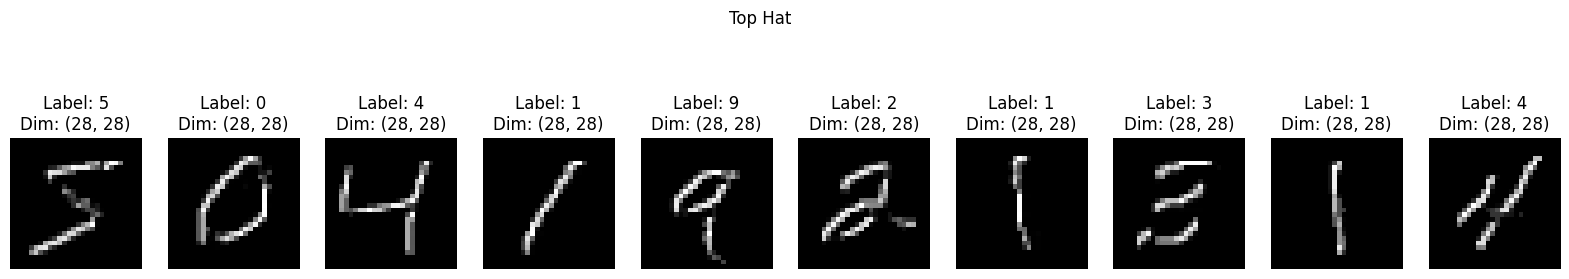

In [17]:
# Top Hat
tophat_images = []
for image in images:
    tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    tophat_images.append(tophat)
display_images(tophat_images, labels, dimensions=[image.shape for image in tophat_images], title='Top Hat')

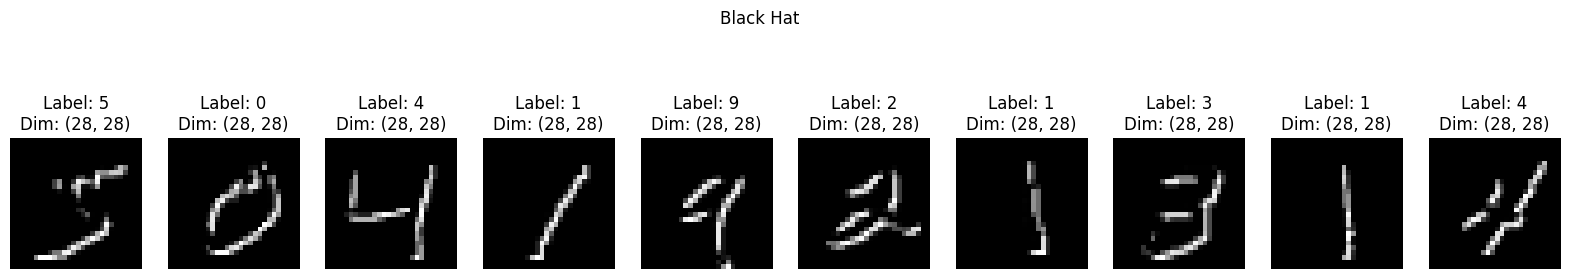

In [18]:
# Black Hat
blackhat_images = []
for image in images:
    blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    blackhat_images.append(blackhat)
display_images(blackhat_images, labels, dimensions=[image.shape for image in blackhat_images], title='Black Hat')

4. Perform Gaussian Blurring and Median Blurring operations and visualize the results

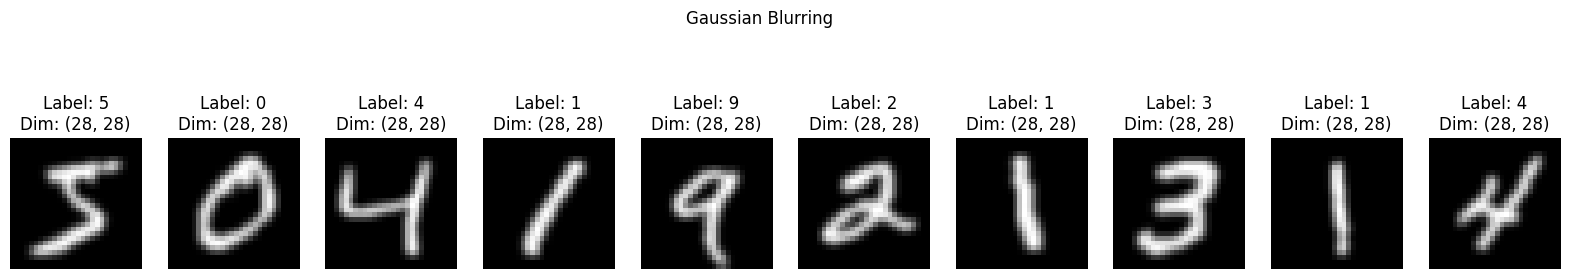

In [19]:
# Gaussian Blurring
gaussian_blur_images = []
for image in images:
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    gaussian_blur_images.append(blurred)
display_images(gaussian_blur_images, labels, dimensions=[image.shape for image in gaussian_blur_images], title='Gaussian Blurring')

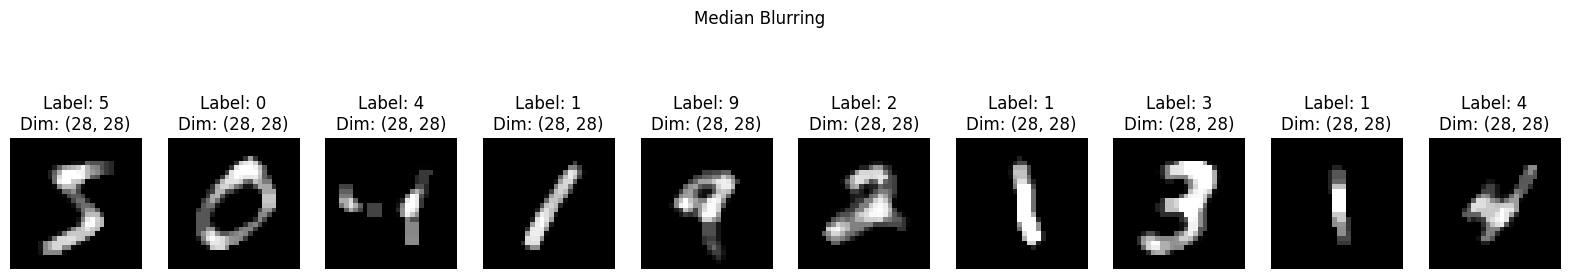

In [20]:
# Median Blurring
median_blur_images = []
for image in images:
    blurred = cv2.medianBlur(image, 5)
    median_blur_images.append(blurred)
display_images(median_blur_images, labels, dimensions=[image.shape for image in median_blur_images], title='Median Blurring')

Video Operations
1. Segment out the specific color objects (eg., blue) in live webcam feed. Track the object of interest in the video feed. Use the color conversion method BGR → HSV for segmenting the required color.
Refer to https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.htm

In [21]:
#for blue color
import cv2
import numpy as np


cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

   # BGR to HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the range of blue color in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])

    mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)
    blue_object = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('Original Frame', frame)
    cv2.imshow('Segmented Blue Object', blue_object)

  #q= quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [22]:
#for green color
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # BGR to HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the range of green color in HSV
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])

    mask = cv2.inRange(hsv_frame, lower_green, upper_green)
    green_object = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('Original Frame', frame)
    cv2.imshow('Segmented Green Object', green_object)

    # q = quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

